# Simple Linear Regression

## The steps for the project are:

- Import necesary packages (e.g. matplotlib and numpy etc.)
- Generate some random sample data (used cooking time vs. knob setting)
- Plot some line that might fit the data (candidate lines)


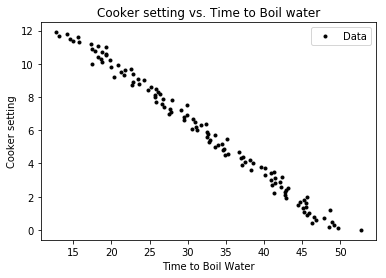

In [23]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Generate random data
y = np.arange(0.0, 12.0, 0.1)
noise = np.random.normal(0.0, 1.0,len(y))
x = -3.0 * y + 50 + noise

# Plot the data
plt.plot(x, y, 'k.', label='Data')
plt.title("Cooker setting vs. Time to Boil water")
plt.ylabel("Cooker setting")
plt.xlabel("Time to Boil Water")
plt.legend()
plt.show()

The next step is to try to find the line which best fits the data. Some candidate lines are plotted below

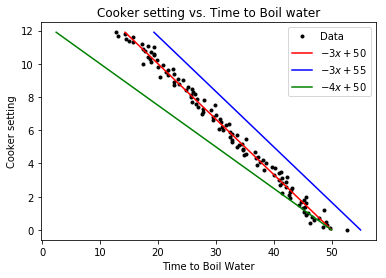

In [24]:
# Plot the data
plt.plot(x, y, 'k.', label='Data')
plt.title("Cooker setting vs. Time to Boil water")
# Plot the candidate line
plt.plot(-3.0*y + 50, y, 'r-', label="$-3x + 50$")
plt.plot(-3.0*y + 55, y, 'b-', label="$-3x + 55$")
plt.plot(-4.0*y + 50, y, 'g-', label="$-4x + 50$")
# Label the plot and show
plt.ylabel("Cooker setting")
plt.xlabel("Time to Boil Water")
plt.legend()
plt.show()

### Calculating the cost

You can see that each of these lines roughly fits the data.
Which one is best, and is there another line that is better than all three?
Is there a "best" line?

It depends how you define the word best.
Luckily, everyone seems to have settled on what the best means.
The best line is the one that minimises the following calculated value.

$$ \sum_i (y_i - mx_i - c)^2 $$

In [27]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(x[i] - m * y[i] - c)**2 for i in range(y.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (-3.0, 50.0, cost(-3.0, 50.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (-3.0, 55.0, cost(-3.0, 55.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (-4.0, 50.0, cost(-4.0, 15.0)))

Cost with m = -3.00 and c = 50.00:   137.82
Cost with m = -3.00 and c = 55.00:  3169.37
Cost with m = -4.00 and c = 50.00: 202625.67


The minimum cost is for the line with m - 3 and c = 50, its the best of the 3 we tried - but what is the best over all?

#### Minimising the cost
We want to calculate values of $m$ and $c$ that give the lowest value for the cost value above.
For our given data set we can plot the cost value/function.
Recall that the cost is:

$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$

This is a function of two variables, $m$ and $c$, so a plot of it is three dimensional.

In [33]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of x and y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from w and d.
x_zero = x - x_avg
y_zero = y - y_avg

#The best m is found by the following calculation. This comes from calculus
m = np.sum(x_zero * y_zero) / np.sum(y_zero * y_zero)
#Use m from above to calculate the best c.
c = x_avg - m * y_avg

print("m is %8.6f and c is %6.6f." % (m, c))


m is -2.972894 and c is 49.812425.


## Plot the best fit line and calculate the cost

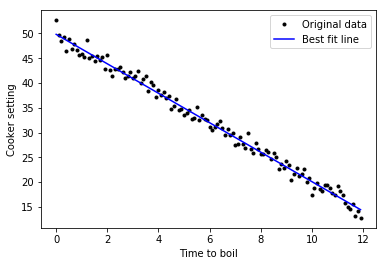

In [41]:
# Plot the best fit line.
plt.plot(y, x, 'k.', label='Original data')
plt.plot(y, m * y + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Time to boil')
plt.ylabel('Cooker setting')
plt.legend()

# Show the plot.
plt.show()

Note that the $Cost$ of the best $m$ and best $c$ is not zero in this case.

In [42]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m = -2.97 and c = 49.81:   136.68
